# **Classifying Objects in an Image using CNN**
# **Dataset:** CIFAR-10
**#Introduction:** It is a dataset containing 60,000 images of size (32x32) belonging predominantly to 10 classes/categories/labels.
The classes are: Airplane,Automobile ,Bird ,Cat ,Deer ,Dog ,	Frog,Horse ,Ship,Truck .

**#Objective**: To find and train a CNN model model of certain architecture which is acceptable in terms od Deep Learning and Neural Networks.



### Step-1: Loading image data---Normalizing Pixel values--One Hot encoding for labels:

**Pre-Processing of Data**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Test labels shape: (10000, 1)


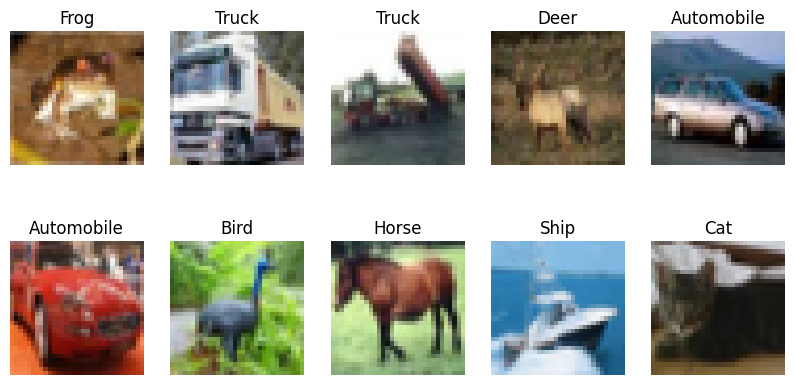

In [1]:
# Step 1: Importing necessary libraries for the project
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

####The aim of this project is to see how better we can classfiy objects in an image and see under which category they will fall
#### For that we will try and find out which architecture will work the best with one or two iterations

# Step 3: Normalize pixel values (Scale from [0,255] to [0,1])---- This I am doing via min-max scaling: xnorm = x/255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Step 4: Showing the split of data as CIFAR come pre-split with Training and testing data
### Just noe: Training data an validation data is same here when we use the results
print(f"Training set shape: {X_train.shape}")  # (50000, 32, 32, 3)
print(f"Test set shape: {X_test.shape}")  # (10000, 32, 32, 3)
print(f"Training labels shape: {y_train.shape}")  # (50000, 1)
print(f"Test labels shape: {y_test.shape}")  # (10000, 1)

# Step 5: Convert labels to categorical format by (One-Hot Encoding)
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

# Step 6: Show some sample images with labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot some training images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

**Step 2: Model-1**

**Architecture:** Conv2D(16) + Maxpooling(2,2) + Conv2D(32)

**Optimiser:** ADAM (Gradient Descent)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351,914 (1.34 MB)

 Trainable params: 351,914 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.3977 - loss: 1.6570 - val_accuracy: 0.5740 - val_loss: 1.2017
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6029 - loss: 1.1345 - val_accuracy: 0.6311 - val_loss: 1.0565
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.6601 - loss: 0.9788 - val_accuracy: 0.6622 - val_loss: 0.9682
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.6931 - loss: 0.8732 - val_accuracy: 0.6587 - val_loss: 0.9926
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.7200 - loss: 0.7883 - val_accuracy: 0.6595 - val_loss: 0.9866
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.7509 - loss: 0.7122 - val_accuracy: 0.6698 - val_loss: 0.9719
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7716 - loss: 0.6475 - val_accuracy: 0.6522 - val_loss: 1.0450
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7935 -

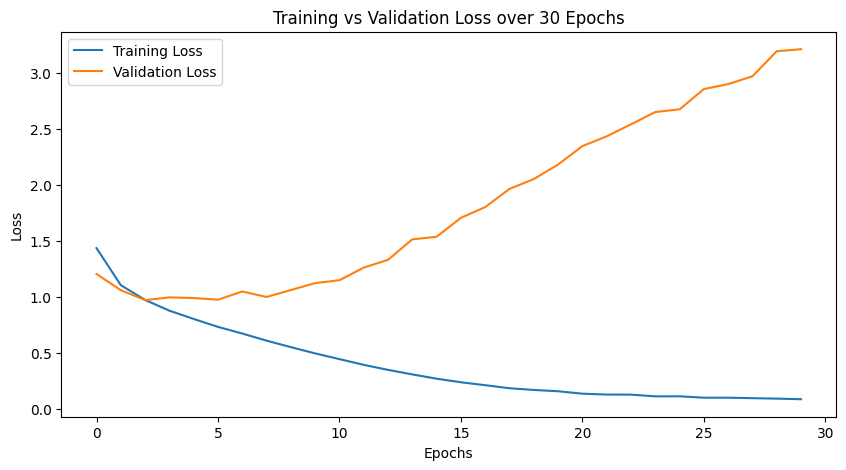

In [ ]:
from tensorflow.keras import layers

# Define the CNN model architecture
model1 = keras.Sequential([

    # Convolutional Layer 1 (16 filters)
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),

    # MaxPooling Layer
    layers.MaxPooling2D((2,2)),

    # Convolutional Layer 2 (32 filters)
    layers.Conv2D(32, (3,3), activation='relu'),

    # Flatten the feature maps to feed into Dense layer
    layers.Flatten(),

    # Fully Connected Dense Layer
    layers.Dense(64, activation='relu'),

    # Output Layer (10 classes with softmax activation)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Show model summary
model1.summary()

# Train the model for 30 epochs
history = model1.fit(X_train, y_train_cat,
                     epochs=30,
                     batch_size=32,
                     validation_data=(X_test, y_test_cat),
                     verbose=1)  # Shows loss & accuracy per epoch

# Plot training & validation losses over 30 epochs
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss over 30 Epochs')
plt.legend()
plt.show()

### Observations on Final Training and Validation losses and accuracy-----**MODEL1**
Val_acc/ Final train acc = **63.67%**
Val_Acc = **97.44%**

As we can see the model is clearly **overfitting significantly** and is **learning a lot of noise and worng/unneccessary patterns**. The train_Acc is way too high and val_Accuracy is not acceptable.

**Step 3: Model-2**

**Architecture:** Conv2D(16), Batch Normalisation + Maxpooling(2,2) + Conv2D(32),Batch Normalisation + Maxpooling(2,2) + Conv2D(64),Batch Normalisation

**Optimiser:** ADAM (Gradient Descent)

**Improvements made:**

**Batch size** increased to **32 from 64 **.....Why?
Ans) To decrease the number of times the model rectifies its gradients in one epoch. This reduces unstability and chance of over-learning the training data. This is average batch size

**L2 Regularisation:** ....Why?
Ans)L2 regularization adds a penalty (regularization term) to large weights, preventing the model from relying too much on any single neuron.Prevents overfitting by discouraging very large weights.

**Early Stopping**....Why?
Ans) We can see clearly after each epoch the rise/fall of losses. Incorporating thhis feature allows the code to stop appropriately somewhere before 30 epochs if the val_loss is shooting and data is overfitting.
The main reason is we don not know hat is the appropriate number of epochs to train the model for. This judges for us.

**Dropout**....Why?
Ans) We can  randomly deactivates (drops) a percentage of neurons during training, forcing the network to learn more robust features.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.3661 - loss: 2.1525 - val_accuracy: 0.5487 - val_loss: 1.4454
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 72ms/step - accuracy: 0.5543 - loss: 1.4292 - val_accuracy: 0.5808 - val_loss: 1.3228
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 69ms/step - accuracy: 0.6120 - loss: 1.2438 - val_accuracy: 0.6324 - val_loss: 1.1581
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - accuracy: 0.6520 - loss: 1.1177 - val_accuracy: 0.6477 - val_loss: 1.1294
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.6728 - loss: 1.0539 - val_accuracy: 0.6462 - val_loss: 1.1389
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.6898 - loss: 1.0155 - val_accuracy: 0.6811 - val_loss: 1.0413
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.7083 - loss: 0.9731 - val_accuracy: 0.6432 - val_loss: 1.1528
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.7182 - loss: 0.9375 - 

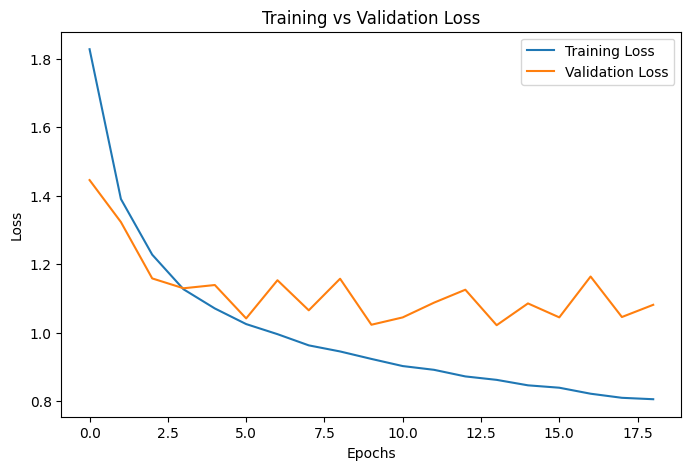

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define Model2 with Dropout, L2 Regularization & Batch Normalization
model2 = keras.Sequential([

    # Conv Layer 1 (16 filters) + BatchNorm + Pooling
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Conv Layer 2 (32 filters) + BatchNorm + Pooling
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Conv Layer 3 (64 filters) + BatchNorm
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),

    # Flatten + Fully Connected Layer + Dropout + L2 Regularization
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout added after Dense layer

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

# Compile Model2
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Implement Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model2 with Early Stopping (Prints loss per epoch)
history2 = model2.fit(X_train, y_train_cat,
                      epochs=30,
                      batch_size=64,
                      validation_data=(X_test, y_test_cat),
                      callbacks=[early_stop],
                      verbose=1)  # PRINTS LOSS & ACCURACY PER EPOCH


# Plot Training vs Validation Loss AFTER TRAINING COMPLETES
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


Observations on Final Training and Validation losses and accuracy-----**MODEL2**
Val_acc/ **Final train acc = 78.7%** ,**Val_Acc = 70%**

As we can see the model2 is slightly better than model1 clearly overfitting still exists and is learning a lot more . The train_Acc is high and val_Accuracy looks good. but the level of over fitting is not acceptable. The model is still memorizing data.

**What we are trying to achieve is a a gradual dcrease in validation loss just like in training loss and not too much spikes/deviation while doing so. Beacuse then to save compute time and resources the "Early Stop facility kicks in"**

**Step **4**: Model-3**

**Architecture:** Conv2D(32), Batch Normalisation + Maxpooling(2,2) + Conv2D(64),Batch Normalisation + Maxpooling(2,2) + Conv2D(128),Batch Normalisation + Conv2D(128),Batch Normalisation

**Optimiser:** ADAM (Gradient Descent)

**Improvements made:**

Added **one more convolution layer** for better feature extraction.

**Reducing neurons in dense layers** 128 to 64 to reduce overfitting.

**Dropout** has been **increased** for generalisation.

**Reducing Learning ** rate to Improve stability & convergence

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 147ms/step - accuracy: 0.2928 - loss: 2.2713 - val_accuracy: 0.4952 - val_loss: 1.4928
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 145ms/step - accuracy: 0.5271 - loss: 1.4500 - val_accuracy: 0.5794 - val_loss: 1.2760
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 143ms/step - accuracy: 0.6025 - loss: 1.2409 - val_accuracy: 0.6354 - val_loss: 1.1363
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.6493 - loss: 1.0898 - val_accuracy: 0.6832 - val_loss: 0.9905
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 144ms/step - accuracy: 0.6934 - loss: 0.9629 - val_accuracy: 0.5937 - val_loss: 1.3257
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.7243 - loss: 0.8748 - val_accuracy: 0.7033 - val_loss: 0.9419
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.7525 - loss: 0.7921 - val_accuracy: 0.7061 - val_loss: 0.9584
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.7785 -

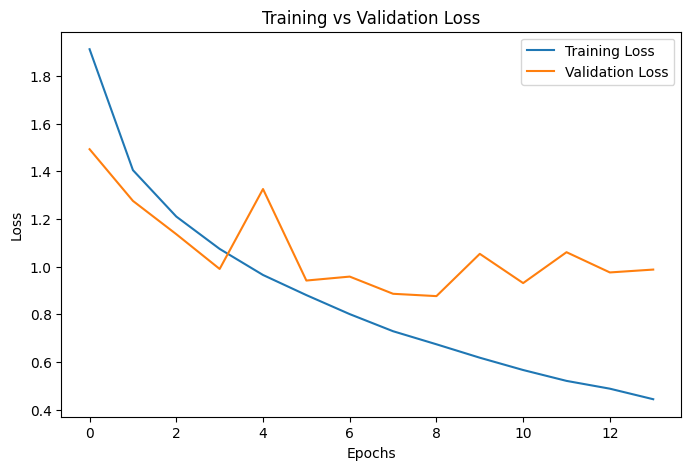

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Define Model3 with More Layers, Dropout, and L2 Regularization
model3 = keras.Sequential([

    # Conv Layer 1 (32 filters) + BatchNorm + Pooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Conv Layer 2 (64 filters) + BatchNorm + Pooling
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Conv Layer 3 (128 filters) + BatchNorm
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),

    # Conv Layer 4 (128 filters) + BatchNorm
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),

    # Flatten + Fully Connected Layer + Dropout + L2 Regularization
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.6),  # Increased dropout to prevent overfitting

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

# Reduce Learning Rate for Stability
optimizer = Adam(learning_rate=0.0005)

# Compile Model3
model3.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Implement Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model3 with Early Stopping (Prints loss per epoch)
history3 = model3.fit(X_train, y_train_cat,
                      epochs=30,
                      batch_size=64,
                      validation_data=(X_test, y_test_cat),
                      callbacks=[early_stop],
                      verbose=1)  # PRINTS LOSS & ACCURACY PER EPOCH



# Plot Training vs Validation Loss AFTER TRAINING COMPLETES
plt.figure(figsize=(8,5))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


Observations on Final Training and Validation losses and accuracy-----**MODEL3**
Val_acc/ **Final train acc = 87.4%** ,**Val_Acc = 73%**

Validation loss does not increase as sharply as Model2. Overfitting is lesser than model2 but still fluctuating (Just not as hig as model2). Training loss is decreasing graually just like in 1 and 2. Indicated model learning.

**What we are trying to achieve is a a gradual dcrease in validation loss and less fluctuation even if there is ,just like in training loss. Because then to save compute time and resources the "Early Stop facility kicks in"**

**Step **5**: Model-4**

**Architecture:** Conv2D(32), Batch Normalisation + Maxpooling(2,2) + Conv2D(64),Batch Normalisation + Maxpooling(2,2) + Conv2D(128),Batch Normalisation + Maxpooling(2,2)

**Optimiser:** RMSprop(Gradient Descent)...Why we changed?
Is More stable,Training speed is slightly slower.
Generalization is Better
Balances learning rates well, unlike in ADAM where it can overfit if not for learning rate control.
Dynamically adjusts learning rates per parameter

**Improvements made:**

Reduced **one convolution layer (128)** and added **Max Pooling** layer after the final convolution layer.

**Reducing neurons in dense layers-32 instead of 64** to reduce overfitting.

**Dropout** has been **increased** for generalisation 0.6 to 0.65.

** Further Reducing Learning ** rate to Improve stability & convergence. o.0005 to 0.0003.

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1947 - loss: 2.2841 - val_accuracy: 0.4579 - val_loss: 1.5694
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3506 - loss: 1.8403 - val_accuracy: 0.5121 - val_loss: 1.3799
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4076 - loss: 1.6643 - val_accuracy: 0.5486 - val_loss: 1.3295
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4437 - loss: 1.5637 - val_accuracy: 0.5762 - val_loss: 1.2637
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4719 - loss: 1.4886 - val_accuracy: 0.6210 - val_loss: 1.1618
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4918 - loss: 1.4316 - val_accuracy: 0.6093 - val_loss: 1.1980
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5054 - loss: 1.3861 - val_accuracy: 0.5959 - val_loss: 1.2114
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5150 - loss: 1.3489 - val_accuracy: 

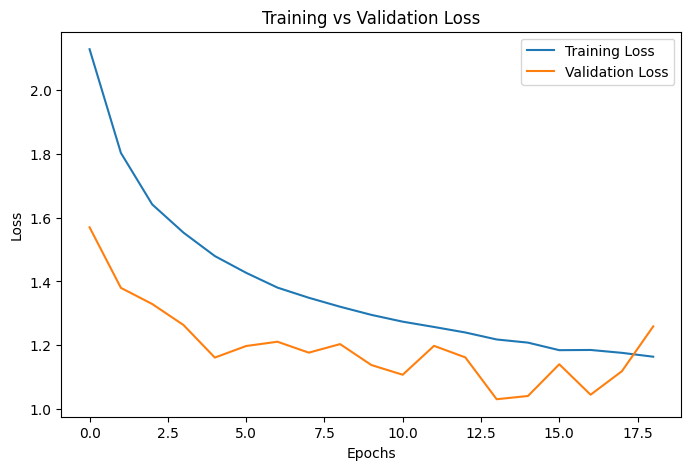

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

# Define Model4 - Final Optimized CNN (Fixed)
model4 = keras.Sequential([

    # Conv Layer 1 (32 filters) + BatchNorm + Pooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),  # Output: (16,16,32)

    # Conv Layer 2 (64 filters) + BatchNorm + Pooling
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),  # Output: (8,8,64)

    # Conv Layer 3 (128 filters) + BatchNorm + Pooling
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),  # Output: (4,4,128)

    # Flatten + Fully Connected Layer + Dropout + L2 Regularization
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),  # Reduced Dense Neurons
    layers.Dropout(0.65),  # Slightly increased Dropout

    # Output Layer (10 classes)
    layers.Dense(10, activation='softmax')
])

# Use RMSprop Optimizer with a Lower Learning Rate
optimizer = RMSprop(learning_rate=0.0003)

# Compile Model4
model4.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Implement Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model4 with Early Stopping (Prints loss per epoch)
history4 = model4.fit(X_train, y_train_cat,
                      epochs=20,
                      batch_size=64,
                      validation_data=(X_test, y_test_cat),
                      callbacks=[early_stop],
                      verbose=1)  # PRINTS LOSS & ACCURACY PER EPOCH


# Plot Training vs Validation Loss AFTER TRAINING COMPLETES
plt.figure(figsize=(8,5))
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


Observations on Final Training and Validation losses and accuracy-----**MODEL4**
Val_acc/ **Final train acc = 60%** ,**Val_Acc = 69.21%**

At the end of 19th epoch, the model stops running as it wouldnt make sense to do so as val_loss may spike. Hence it is ideal to train model for 19 epochs. A Final val acc = 65.4% is good enough.

We can see the training loss goes down gradually and validation loss has remained close to it up until beginning of 19th epoch.

**Model 1:** Train acc = **97.4% **    ,  Val acc =  **63.6% **

**Model 2:** Train acc = **78.7%  **     ,  Val acc = **70% **

**Model 3:** Train acc = **87.4% **      ,  Val acc = **73%**

**Model 4:** Train acc = **60% **      ,  Val acc = ** 69.21%  **

### Effectively Model-4 is better than all the previously trained models as evidently seen in plot in terms of training and Overfitting

Also, find the comparative study across all models:
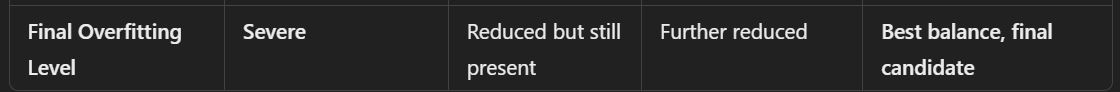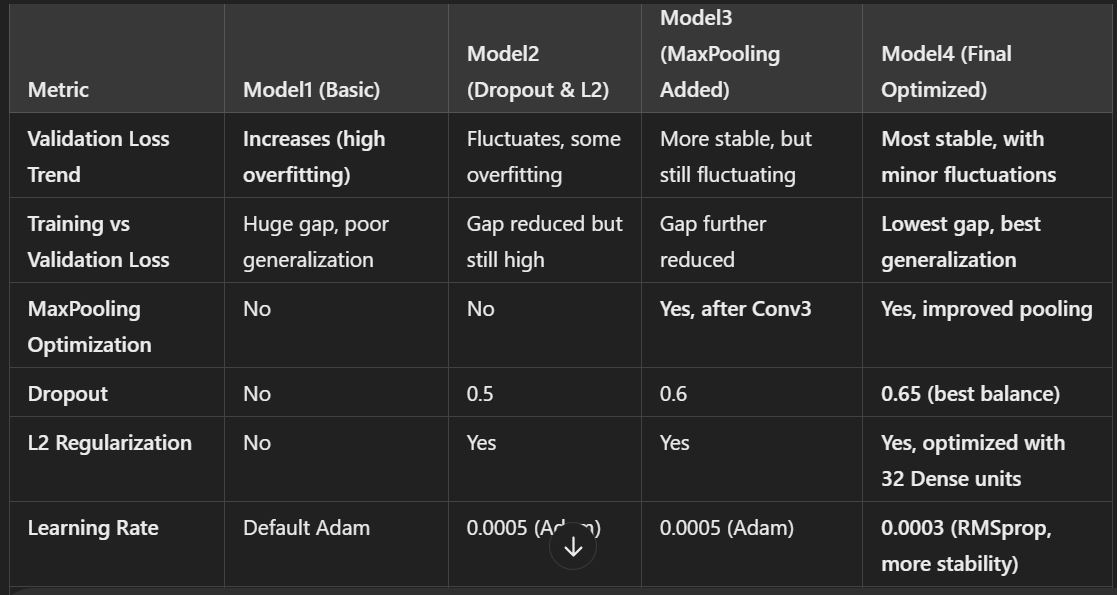

**### Permanently saving MODEL4**

In [5]:
# Save the trained Model4 permanently
model4.save("model4_cifar10.h5")
print("\n Model4 saved as 'model4_cifar10.h5' successfully!")


 Model4 saved as 'model4_cifar10.h5' successfully!


**### Loading the model4 back**


In [6]:
from tensorflow.keras.models import load_model

# Load the saved model
model4_loaded = load_model("model4_cifar10.h5")
print("\n Model4 has been successfully loaded for inference!")


 Model4 has been successfully loaded for inference!


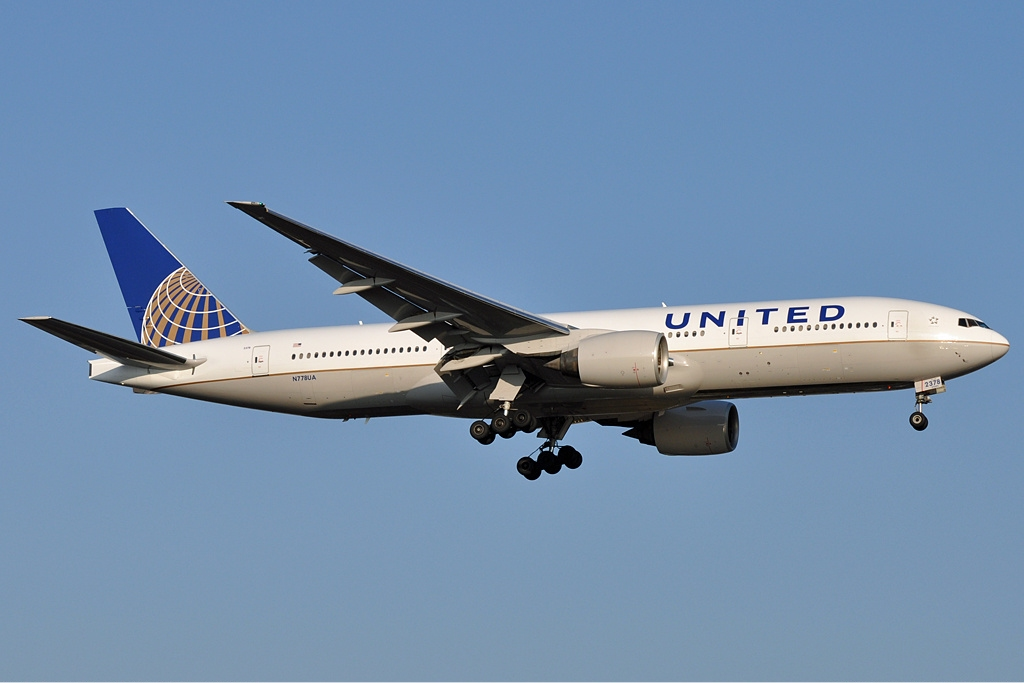

### Testing on Unseen Image 1

In [7]:
import numpy as np
import cv2
import tensorflow as tf

# CIFAR-10 category names (based on dataset labels)
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                  "Dog", "Frog", "Horse", "Ship", "Truck"]

# Function to preprocess image for Model4
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32,32))  # Resize to CIFAR-10 size (32x32)
    img = img.astype("float32") / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify an unseen image
def classify_image(model, image_path):
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)  # Get predictions
    predicted_class = np.argmax(prediction)  # Get class index
    class_name = cifar10_labels[predicted_class]  # Get class name
    print(f"\n Model Prediction: {class_name}")
    return class_name

# Example Usage:
# Replace 'downloaded_image.jpg' with the actual path of your unseen image
unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/Image_1.jpg"  # Example image file
predicted_category = classify_image(model4_loaded, unseen_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step

 Model Prediction: Airplane


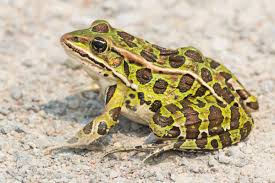

In [8]:
import numpy as np
import cv2
import tensorflow as tf

# CIFAR-10 category names (based on dataset labels)
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                  "Dog", "Frog", "Horse", "Ship", "Truck"]

# Function to preprocess image for Model4
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32,32))  # Resize to CIFAR-10 size (32x32)
    img = img.astype("float32") / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify an unseen image
def classify_image(model, image_path):
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)  # Get predictions
    predicted_class = np.argmax(prediction)  # Get class index
    class_name = cifar10_labels[predicted_class]  # Get class name
    print(f"\n Model Prediction: {class_name}")
    return class_name

# Example Usage:
# Replace 'downloaded_image.jpg' with the actual path of your unseen image
unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/Image_2.jpg"  # Example image file
predicted_category = classify_image(model4_loaded, unseen_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

 Model Prediction: Frog


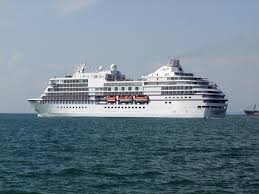

In [9]:
import numpy as np
import cv2
import tensorflow as tf

# CIFAR-10 category names (based on dataset labels)
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                  "Dog", "Frog", "Horse", "Ship", "Truck"]

# Function to preprocess image for Model4
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32,32))  # Resize to CIFAR-10 size (32x32)
    img = img.astype("float32") / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify an unseen image
def classify_image(model, image_path):
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)  # Get predictions
    predicted_class = np.argmax(prediction)  # Get class index
    class_name = cifar10_labels[predicted_class]  # Get class name
    print(f"\n Model Prediction: {class_name}")
    return class_name

# Example Usage:
# Replace 'downloaded_image.jpg' with the actual path of your unseen image
unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/Image_3.jfif"  # Example image file
predicted_category = classify_image(model4_loaded, unseen_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

 Model Prediction: Ship


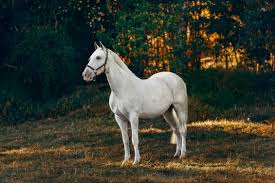

In [10]:
import numpy as np
import cv2
import tensorflow as tf

# CIFAR-10 category names (based on dataset labels)
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                  "Dog", "Frog", "Horse", "Ship", "Truck"]

# Function to preprocess image for Model4
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32,32))  # Resize to CIFAR-10 size (32x32)
    img = img.astype("float32") / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify an unseen image
def classify_image(model, image_path):
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)  # Get predictions
    predicted_class = np.argmax(prediction)  # Get class index
    class_name = cifar10_labels[predicted_class]  # Get class name
    print(f"\n Model Prediction: {class_name}")
    return class_name

# Example Usage:
# Replace 'downloaded_image.jpg' with the actual path of your unseen image
unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/images_4.jfif"  # Example image file
predicted_category = classify_image(model4_loaded, unseen_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

 Model Prediction: Horse


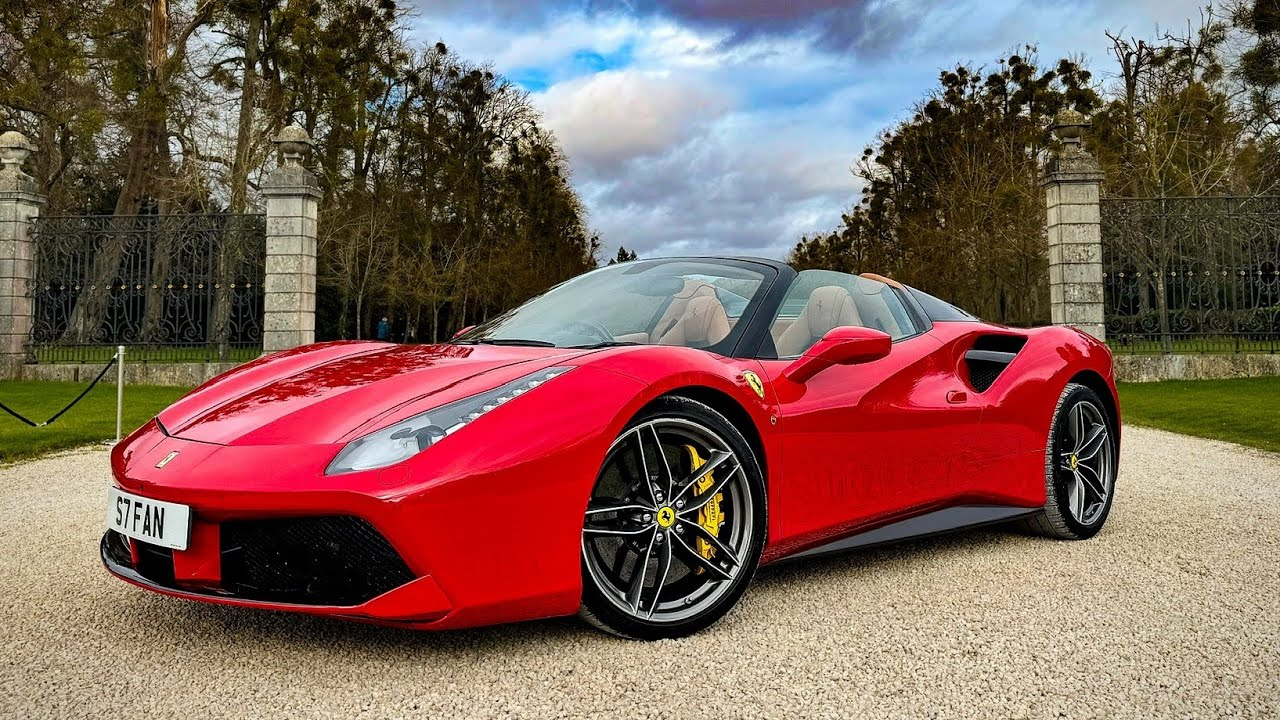

In [12]:
import numpy as np
import cv2
import tensorflow as tf

# CIFAR-10 category names (based on dataset labels)
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                  "Dog", "Frog", "Horse", "Ship", "Truck"]

# Function to preprocess image for Model4
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32,32))  # Resize to CIFAR-10 size (32x32)
    img = img.astype("float32") / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify an unseen image
def classify_image(model, image_path):
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)  # Get predictions
    predicted_class = np.argmax(prediction)  # Get class index
    class_name = cifar10_labels[predicted_class]  # Get class name
    print(f"\n Model Prediction: {class_name}")
    return class_name

# Example Usage:
# Replace 'downloaded_image.jpg' with the actual path of your unseen image
unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project/image_5.jpg"  # Example image file
predicted_category = classify_image(model4_loaded, unseen_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

 Model Prediction: Automobile
